In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle

# ===============================
# Configuración profesional
# ===============================
plt.style.use('seaborn-v0_8')
mpl.rcParams.update({
    'font.size': 14,
    'figure.titlesize': 20,
    'figure.figsize': (16, 10),
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# ===============================
# Generación del dataset
# ===============================
np.random.seed(42)
meses = pd.date_range('2024-01-01', periods=12, freq='M')

df = pd.DataFrame({
    'mes': meses,
    'ventas_objetivo': [100000, 105000, 110000, 108000, 115000, 120000, 
                        125000, 128000, 130000, 135000, 138000, 140000],
    'ventas_real': [95000, 102000, 105000, 112000, 118000, 115000,
                     122000, 135000, 128000, 142000, 145000, 148000],
    'margen_promedio': np.random.normal(0.25, 0.05, 12),
    'clientes_nuevos': np.random.randint(50, 150, 12),
    'satisfaccion': np.random.normal(4.2, 0.3, 12).clip(1, 5)
})

# ===============================
# Métricas clave para storytelling
# ===============================
df['cumplimiento'] = (df['ventas_real'] / df['ventas_objetivo'] * 100).round(1)
df['mes_nombre'] = df['mes'].dt.strftime('%b %Y')

print("Dataset de rendimiento de ventas preparado")
print(f"Promedio de cumplimiento: {df['cumplimiento'].mean():.1f}%")
print(f"Mejor mes: {df.loc[df['cumplimiento'].idxmax(), 'mes_nombre']} ({df['cumplimiento'].max()}%)")
print(f"Peor mes: {df.loc[df['cumplimiento'].idxmin(), 'mes_nombre']} ({df['cumplimiento'].min()}%)")

df.head()

Dataset de rendimiento de ventas preparado
Promedio de cumplimiento: 100.6%
Mejor mes: Dec 2024 (105.7%)
Peor mes: Jan 2024 (95.0%)


C:\Users\vylo0\AppData\Local\Temp\ipykernel_15200\1682634377.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses = pd.date_range('2024-01-01', periods=12, freq='M')


,mes,ventas_objetivo,ventas_real,margen_promedio,clientes_nuevos,satisfaccion,cumplimiento,mes_nombre
0,2024-01-31,100000,95000,0.274836,125,4.639695,95.0,Jan 2024
1,2024-02-29,105000,102000,0.243087,107,4.132267,97.1,Feb 2024
2,2024-03-31,110000,105000,0.282384,71,4.220258,95.5,Mar 2024
3,2024-04-30,108000,112000,0.326151,138,3.772576,103.7,Apr 2024
4,2024-05-31,115000,118000,0.238292,98,4.036685,102.6,May 2024


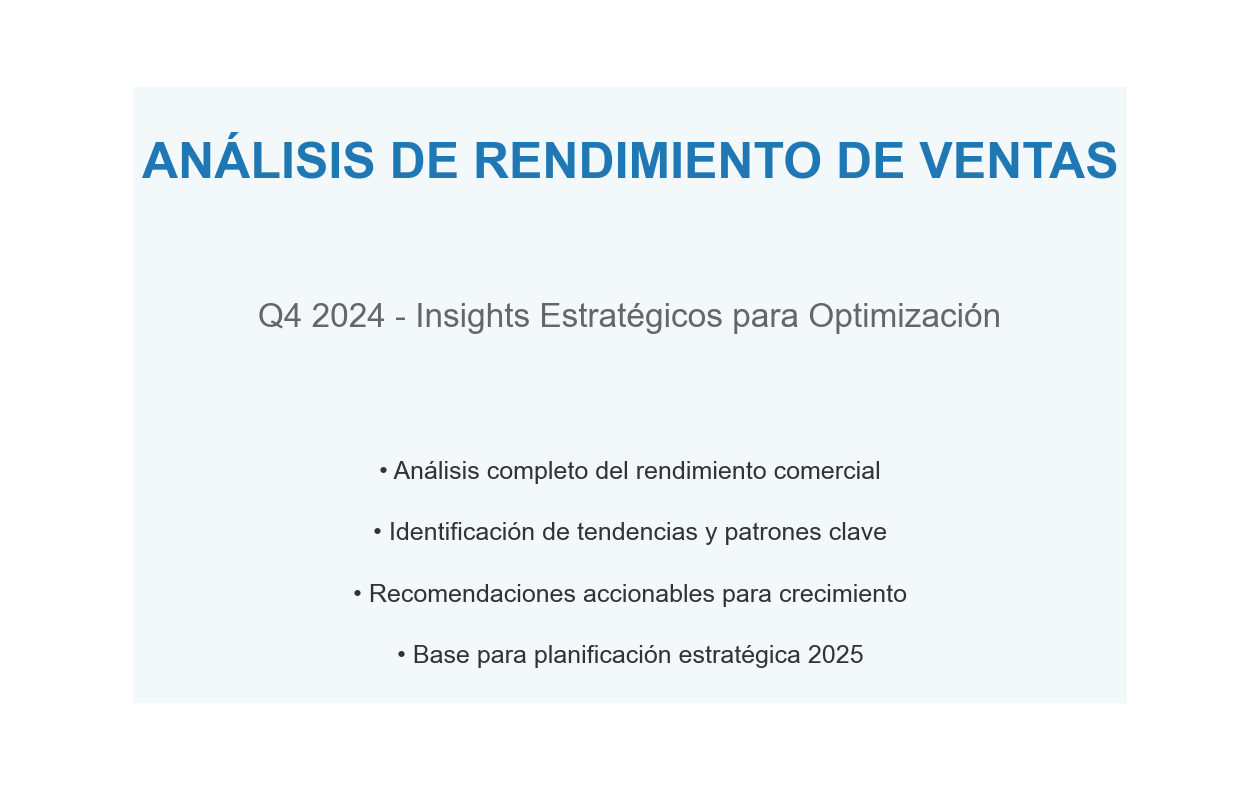

Diapositiva de título guardada como 'diapositiva_01_titulo.png'


In [2]:
# ===============================
# Diapositiva 1: Título y contexto
# ===============================
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('off')

# Título principal
ax.text(0.5, 0.8, 'ANÁLISIS DE RENDIMIENTO DE VENTAS', 
        ha='center', va='center', fontsize=36, fontweight='bold', color='#1f77b4')

# Subtítulo
ax.text(0.5, 0.6, 'Q4 2024 - Insights Estratégicos para Optimización', 
        ha='center', va='center', fontsize=24, color='#666666')

# Contexto ejecutivo
contexto = """
• Análisis completo del rendimiento comercial
• Identificación de tendencias y patrones clave
• Recomendaciones accionables para crecimiento
• Base para planificación estratégica 2025
"""

y_pos = 0.4
for line in contexto.strip().split('\n'):
    ax.text(0.5, y_pos, line, ha='center', va='center', 
            fontsize=18, color='#333333')
    y_pos -= 0.08

# Elemento visual de fondo sutil
rect = Rectangle((0.1, 0.1), 0.8, 0.8, fill=True, alpha=0.05, color='#1f77b4')
ax.add_patch(rect)

plt.savefig('diapositiva_01_titulo.png', dpi=300, bbox_inches='tight')
plt.show()

print("Diapositiva de título guardada como 'diapositiva_01_titulo.png'")

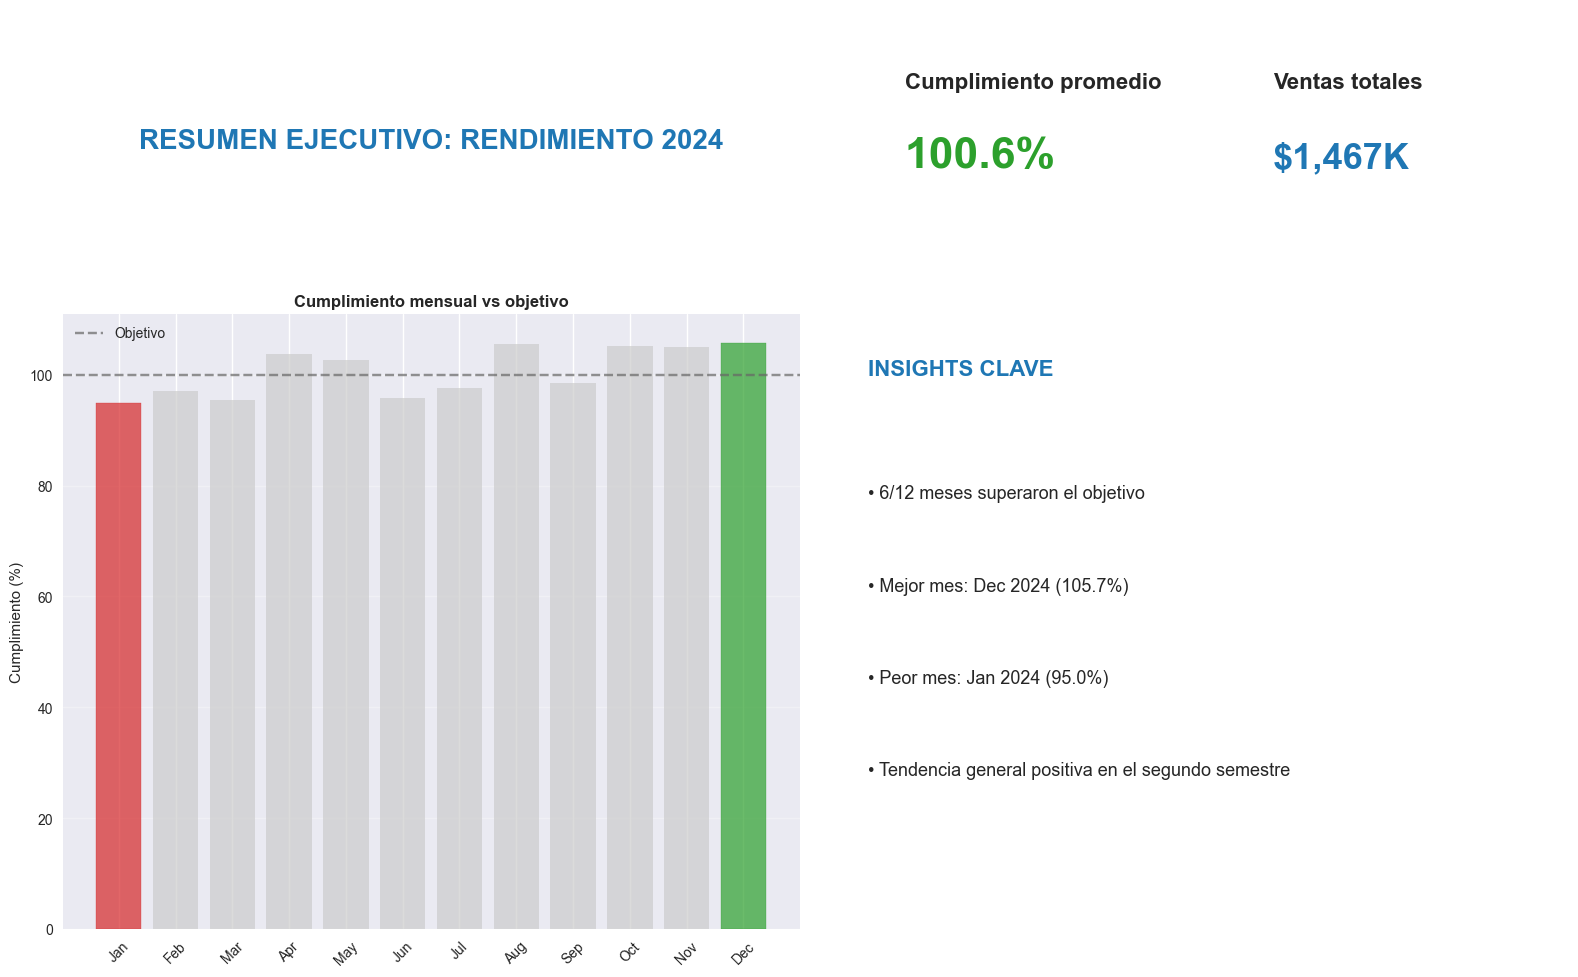

Diapositiva de insights guardada como 'diapositiva_02_insights_principales.png'


In [3]:
# =========================================
# Diapositiva 2: Insights principales
# =========================================
fig, ((ax_title, ax_kpi), (ax_chart, ax_insights)) = plt.subplots(
    2, 2,
    figsize=(16, 10),
    gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [0.3, 0.7]}
)

# -----------------------------
# Título de sección
# -----------------------------
ax_title.text(
    0.5, 0.5,
    'RESUMEN EJECUTIVO: RENDIMIENTO 2024',
    ha='center', va='center',
    fontsize=20, fontweight='bold', color='#1f77b4'
)
ax_title.axis('off')

# -----------------------------
# KPIs principales (alta jerarquía)
# -----------------------------
ax_kpi.axis('off')

cumplimiento_promedio = df['cumplimiento'].mean()
color_kpi = (
    '#2ca02c' if cumplimiento_promedio >= 100
    else '#ff7f0e' if cumplimiento_promedio >= 95
    else '#d62728'
)

ax_kpi.text(0.1, 0.7, 'Cumplimiento promedio', fontsize=16, fontweight='bold')
ax_kpi.text(0.1, 0.4, f'{cumplimiento_promedio:.1f}%',
            fontsize=32, fontweight='bold', color=color_kpi)

ax_kpi.text(0.6, 0.7, 'Ventas totales', fontsize=16, fontweight='bold')
ax_kpi.text(0.6, 0.4,
            f'${df["ventas_real"].sum()/1000:,.0f}K',
            fontsize=26, fontweight='bold', color='#1f77b4')

# -----------------------------
# Gráfico principal con énfasis
# -----------------------------
bars = ax_chart.bar(
    range(len(df)),
    df['cumplimiento'],
    color='#cccccc',
    alpha=0.7
)

mejor_idx = df['cumplimiento'].idxmax()
peor_idx = df['cumplimiento'].idxmin()

bars[mejor_idx].set_color('#2ca02c')  # mejor mes
bars[peor_idx].set_color('#d62728')  # peor mes

ax_chart.axhline(100, color='#666666', linestyle='--', alpha=0.7, label='Objetivo')
ax_chart.set_xticks(range(len(df)))
ax_chart.set_xticklabels(df['mes'].dt.strftime('%b'), rotation=45)
ax_chart.set_ylabel('Cumplimiento (%)')
ax_chart.set_title('Cumplimiento mensual vs objetivo', fontweight='bold')
ax_chart.legend()
ax_chart.grid(True, alpha=0.3, axis='y')

# -----------------------------
# Panel de insights clave
# -----------------------------
ax_insights.axis('off')
ax_insights.text(0.05, 0.9, 'INSIGHTS CLAVE',
                 fontsize=16, fontweight='bold', color='#1f77b4')

insights = [
    f"• {len(df[df['cumplimiento'] >= 100])}/12 meses superaron el objetivo",
    f"• Mejor mes: {df.loc[mejor_idx, 'mes_nombre']} ({df.loc[mejor_idx, 'cumplimiento']}%)",
    f"• Peor mes: {df.loc[peor_idx, 'mes_nombre']} ({df.loc[peor_idx, 'cumplimiento']}%)",
    f"• Tendencia general positiva en el segundo semestre"
]

y = 0.7
for insight in insights:
    ax_insights.text(0.05, y, insight, fontsize=13)
    y -= 0.15

plt.tight_layout()
plt.savefig('diapositiva_02_insights_principales.png', dpi=300, bbox_inches='tight')
plt.show()

print("Diapositiva de insights guardada como 'diapositiva_02_insights_principales.png'")

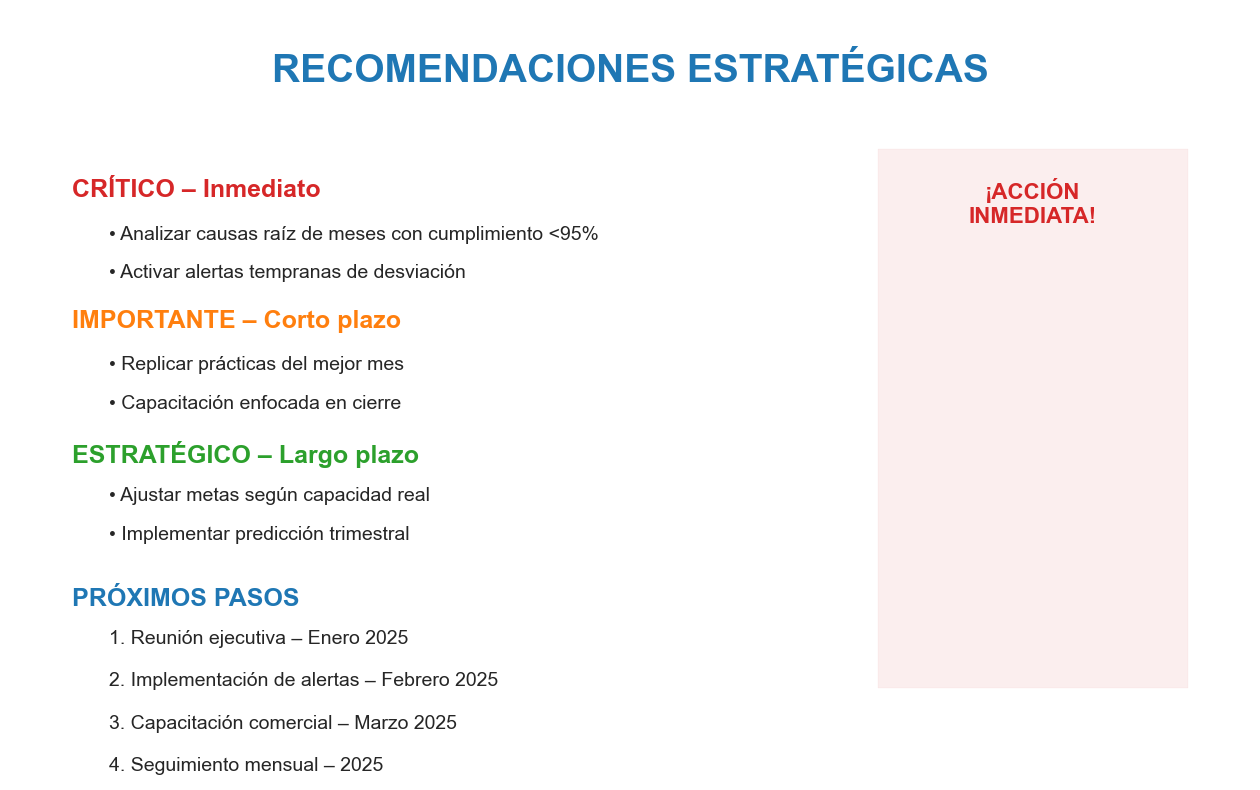

Diapositiva 3 corregida y guardada correctamente


In [7]:
# =========================================
# Diapositiva 3: Recomendaciones y acción (FIX LAYOUT)
# =========================================
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('off')

# -----------------------------
# Título principal
# -----------------------------
ax.text(
    0.5, 0.92,
    'RECOMENDACIONES ESTRATÉGICAS',
    ha='center', va='center',
    fontsize=28, fontweight='bold', color='#1f77b4'
)

# -----------------------------
# Recomendaciones priorizadas
# -----------------------------
recomendaciones = [
    ("CRÍTICO – Inmediato", "#d62728", [
        "• Analizar causas raíz de meses con cumplimiento <95%",
        "• Activar alertas tempranas de desviación"
    ]),
    ("IMPORTANTE – Corto plazo", "#ff7f0e", [
        "• Replicar prácticas del mejor mes",
        "• Capacitación enfocada en cierre"
    ]),
    ("ESTRATÉGICO – Largo plazo", "#2ca02c", [
        "• Ajustar metas según capacidad real",
        "• Implementar predicción trimestral"
    ])
]

y_inicio = 0.78
bloque_altura = 0.17  # altura fija por bloque

for prioridad, color, items in recomendaciones:
    ax.text(
        0.05, y_inicio,
        prioridad,
        fontsize=18, fontweight='bold',
        color=color, va='top'
    )
    
    y_item = y_inicio - 0.06
    for item in items:
        ax.text(0.08, y_item, item, fontsize=14, va='top')
        y_item -= 0.05

    y_inicio -= bloque_altura

# -----------------------------
# Próximos pasos (sección separada)
# -----------------------------
ax.text(
    0.05, 0.25,
    'PRÓXIMOS PASOS',
    fontsize=18, fontweight='bold',
    color='#1f77b4', va='top'
)

proximos_pasos = [
    "1. Reunión ejecutiva – Enero 2025",
    "2. Implementación de alertas – Febrero 2025",
    "3. Capacitación comercial – Marzo 2025",
    "4. Seguimiento mensual – 2025"
]

for i, paso in enumerate(proximos_pasos):
    ax.text(
        0.08, 0.25 - (i + 1) * 0.055,
        paso, fontsize=14, va='top'
    )

# -----------------------------
# Elemento visual de urgencia
# -----------------------------
rect = Rectangle(
    (0.7, 0.12), 0.25, 0.7,
    fill=True, alpha=0.08, color='#d62728'
)
ax.add_patch(rect)

ax.text(
    0.825, 0.75,
    '¡ACCIÓN\nINMEDIATA!',
    ha='center', va='center',
    fontsize=16, fontweight='bold',
    color='#d62728'
)

plt.savefig('diapositiva_03_recomendaciones.png', dpi=300, bbox_inches='tight')
plt.show()

print("Diapositiva 3 corregida y guardada correctamente")

In [9]:
import pandas as pd
import numpy as np

# =========================
# 1. Generar dataset base
# =========================
np.random.seed(42)

meses = pd.date_range('2024-01-01', periods=12, freq='ME')

df = pd.DataFrame({
    'mes': meses,
    'ventas_objetivo': [100000, 105000, 110000, 108000, 115000, 120000, 
                       125000, 128000, 130000, 135000, 138000, 140000],
    'ventas_real': [95000, 102000, 105000, 112000, 118000, 115000,
                   122000, 135000, 128000, 142000, 145000, 148000],
    'margen_promedio': np.random.normal(0.25, 0.05, 12),
    'clientes_nuevos': np.random.randint(50, 150, 12),
    'satisfaccion': np.random.normal(4.2, 0.3, 12).clip(1, 5)
})

df['cumplimiento'] = (df['ventas_real'] / df['ventas_objetivo'] * 100).round(1)
df['mes_nombre'] = df['mes'].dt.strftime('%b %Y')

# =========================
# 2. Tablas derivadas
# =========================

# Resumen ejecutivo
resumen_general = pd.DataFrame({
    'metricas': [
        'Ventas totales',
        'Ventas objetivo totales',
        'Cumplimiento promedio (%)',
        'Mejor mes',
        'Peor mes'
    ],
    'valor': [
        df['ventas_real'].sum(),
        df['ventas_objetivo'].sum(),
        round(df['cumplimiento'].mean(), 1),
        df.loc[df['cumplimiento'].idxmax(), 'mes_nombre'],
        df.loc[df['cumplimiento'].idxmin(), 'mes_nombre']
    ]
})

# Cumplimiento mensual (para gráficos)
cumplimiento_mensual = df[['mes_nombre', 'ventas_objetivo', 'ventas_real', 'cumplimiento']]

# Mejor y peor mes
mejor_peor_mes = df.loc[
    [df['cumplimiento'].idxmax(), df['cumplimiento'].idxmin()],
    ['mes_nombre', 'ventas_objetivo', 'ventas_real', 'cumplimiento']
].reset_index(drop=True)

# Brecha de ventas (<95%)
brecha_ventas = df[df['cumplimiento'] < 95].copy()
brecha_ventas['brecha'] = brecha_ventas['ventas_objetivo'] - brecha_ventas['ventas_real']

# =========================
# 3. Exportar a Excel
# =========================
output_file = 'dataset_y_tablas_rendimiento_ventas_dia4.xlsx'

with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='dataset_base', index=False)
    resumen_general.to_excel(writer, sheet_name='resumen_general', index=False)
    cumplimiento_mensual.to_excel(writer, sheet_name='cumplimiento_mensual', index=False)
    mejor_peor_mes.to_excel(writer, sheet_name='mejor_peor_mes', index=False)
    brecha_ventas.to_excel(writer, sheet_name='brecha_ventas', index=False)

print("Archivo Excel generado correctamente:")
print(f"➡️ {output_file}")
print("Incluye dataset base y todas las tablas utilizadas en el análisis.")

Archivo Excel generado correctamente:
➡️ dataset_y_tablas_rendimiento_ventas_dia4.xlsx
Incluye dataset base y todas las tablas utilizadas en el análisis.
